<a href="https://colab.research.google.com/github/zisx96/heart-disease-P/blob/main/heartprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediciton**

# **Introduction-**

The diagnosis of heart disease is usually based on signs, symptoms and physical examination of the patient. There are several factors that increase the risk of heart disease, such as smoking habit, body cholesterol level, family history of heart disease, obesity, high blood pressure, and lack of physical exercise.

Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

Our objective in this health problem is to identify patients with a heart disease.

This project predicts people with cardiovascular disease by extracting the patient medical history that leads to a fatal heart disease from a dataset that includes patients' medical history such as chest pain, sugar level, blood pressure, etc.


# **Attribute Information:**

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient   
   has hypertension. 
5. stroke: 0 if the patient doesn't have any heart stroke, 1 if the patient
   has a stroke.
6. chest_pain: 0 if the patient doesn't have chest pain, 1 if the patient has 
   a chest pain.
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or
   "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. heart_disease: 1 if the patient had a heart disease or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patien




# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ml/datasets/heart.csv')
df.head()

,id,gender,age,hypertension,stroke,chest_pain,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,NaN,never smoked,0
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.4,smokes,0
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.0,never smoked,0


In [3]:
df.shape

(249, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 249 non-null    int64  
 1   gender             249 non-null    object 
 2   age                249 non-null    float64
 3   hypertension       249 non-null    int64  
 4   stroke             249 non-null    int64  
 5   chest_pain         249 non-null    int64  
 6   work_type          249 non-null    object 
 7   Residence_type     249 non-null    object 
 8   avg_glucose_level  249 non-null    float64
 9   bmi                209 non-null    float64
 10  smoking_status     249 non-null    object 
 11  heart_disease      249 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 23.5+ KB


In [5]:
df.describe()

,id,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.000000
mean,37115.068273,67.728193,0.265060,0.188755,0.116466,132.544739,30.471292,0.421687
std,21993.344872,12.727419,0.442254,0.392102,0.321429,61.921056,6.329452,0.494824
min,210.000000,1.320000,0.000000,0.000000,0.000000,56.110000,16.900000,0.000000
25%,17013.000000,59.000000,0.000000,0.000000,0.000000,79.790000,26.400000,0.000000
50%,36706.000000,71.000000,0.000000,0.000000,0.000000,105.220000,29.700000,0.000000
75%,56669.000000,78.000000,1.000000,0.000000,0.000000,196.710000,33.700000,1.000000
max,72918.000000,82.000000,1.000000,1.000000,1.000000,271.740000,56.600000,1.000000


In [6]:
df.isna().sum()

id                    0
gender                0
age                   0
hypertension          0
stroke                0
chest_pain            0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  40
smoking_status        0
heart_disease         0
dtype: int64

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'stroke', 'chest_pain',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'heart_disease'],
      dtype='object')

In [8]:
from sklearn.impute import KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [10]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
stroke               0
chest_pain           0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
heart_disease        0
dtype: int64

In [11]:
df.head()

,id,gender,age,hypertension,stroke,chest_pain,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,30.471292,never smoked,0
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.400000,smokes,0
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.000000,never smoked,0


 **EDA (Exploratory Data Analysis)**

 EDA is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

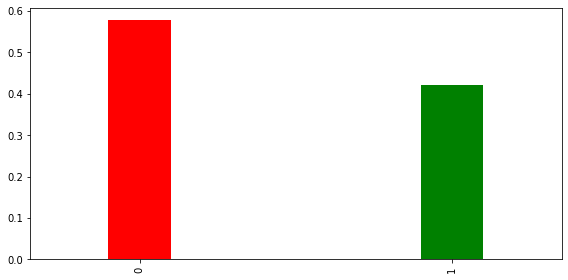

In [12]:
fig, axes = plt.subplots(figsize=(8, 4))
df['heart_disease'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 249 non-null    int64  
 1   gender             249 non-null    object 
 2   age                249 non-null    float64
 3   hypertension       249 non-null    int64  
 4   stroke             249 non-null    int64  
 5   chest_pain         249 non-null    int64  
 6   work_type          249 non-null    object 
 7   Residence_type     249 non-null    object 
 8   avg_glucose_level  249 non-null    float64
 9   bmi                249 non-null    float64
 10  smoking_status     249 non-null    object 
 11  heart_disease      249 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 23.5+ KB


In [14]:
cols = df[['age', 'hypertension', 'stroke','chest_pain','avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi
0,67.0,0,1,0,228.69,36.600000
1,61.0,0,0,0,202.21,30.471292
2,80.0,0,1,0,105.92,32.500000
3,49.0,0,0,0,171.23,34.400000
4,79.0,1,0,0,174.12,24.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

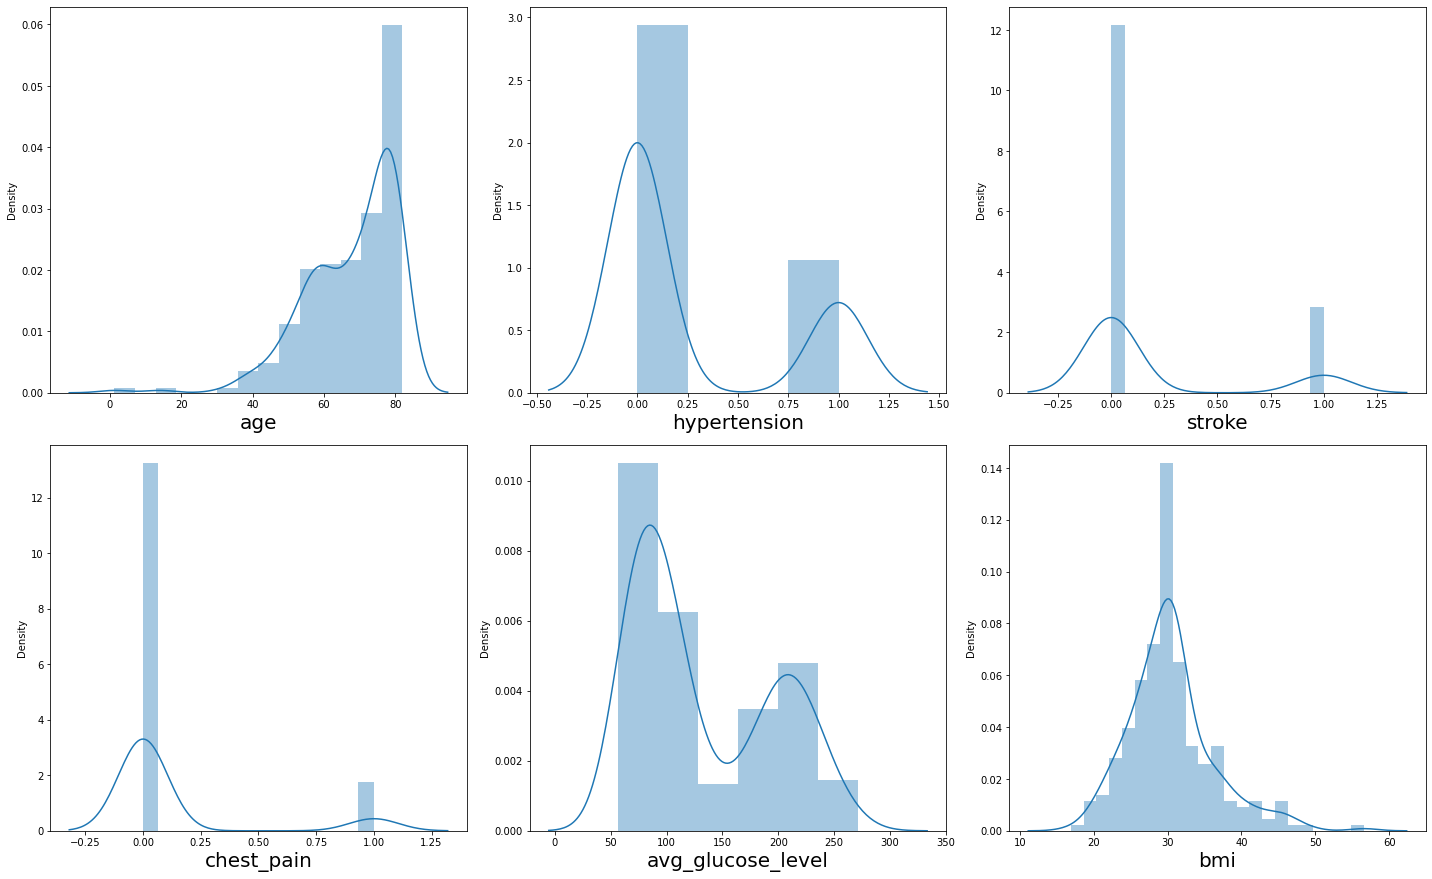

In [15]:
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

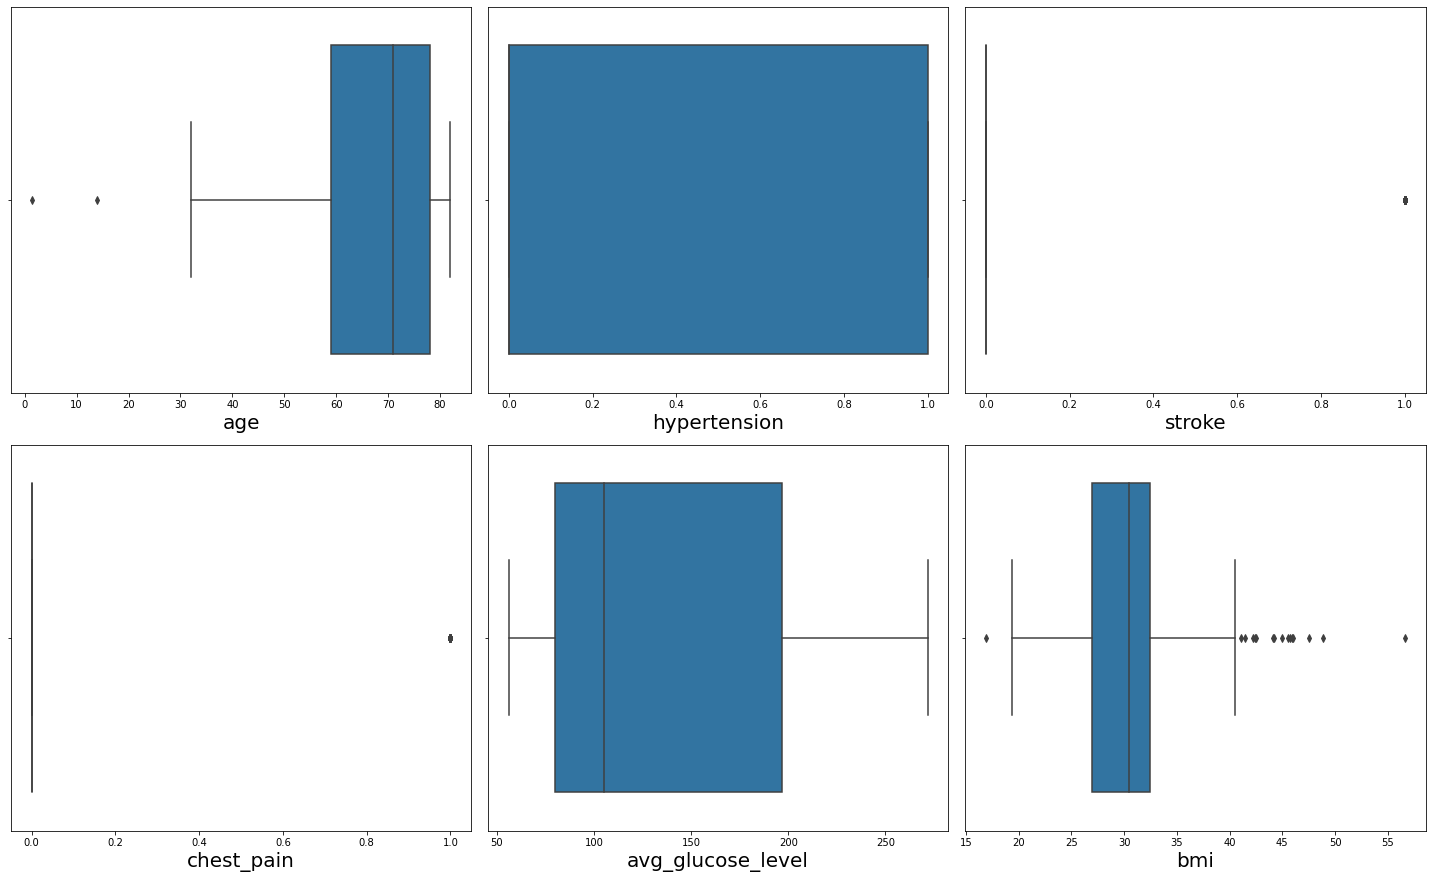

In [16]:
# lets see outliers
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

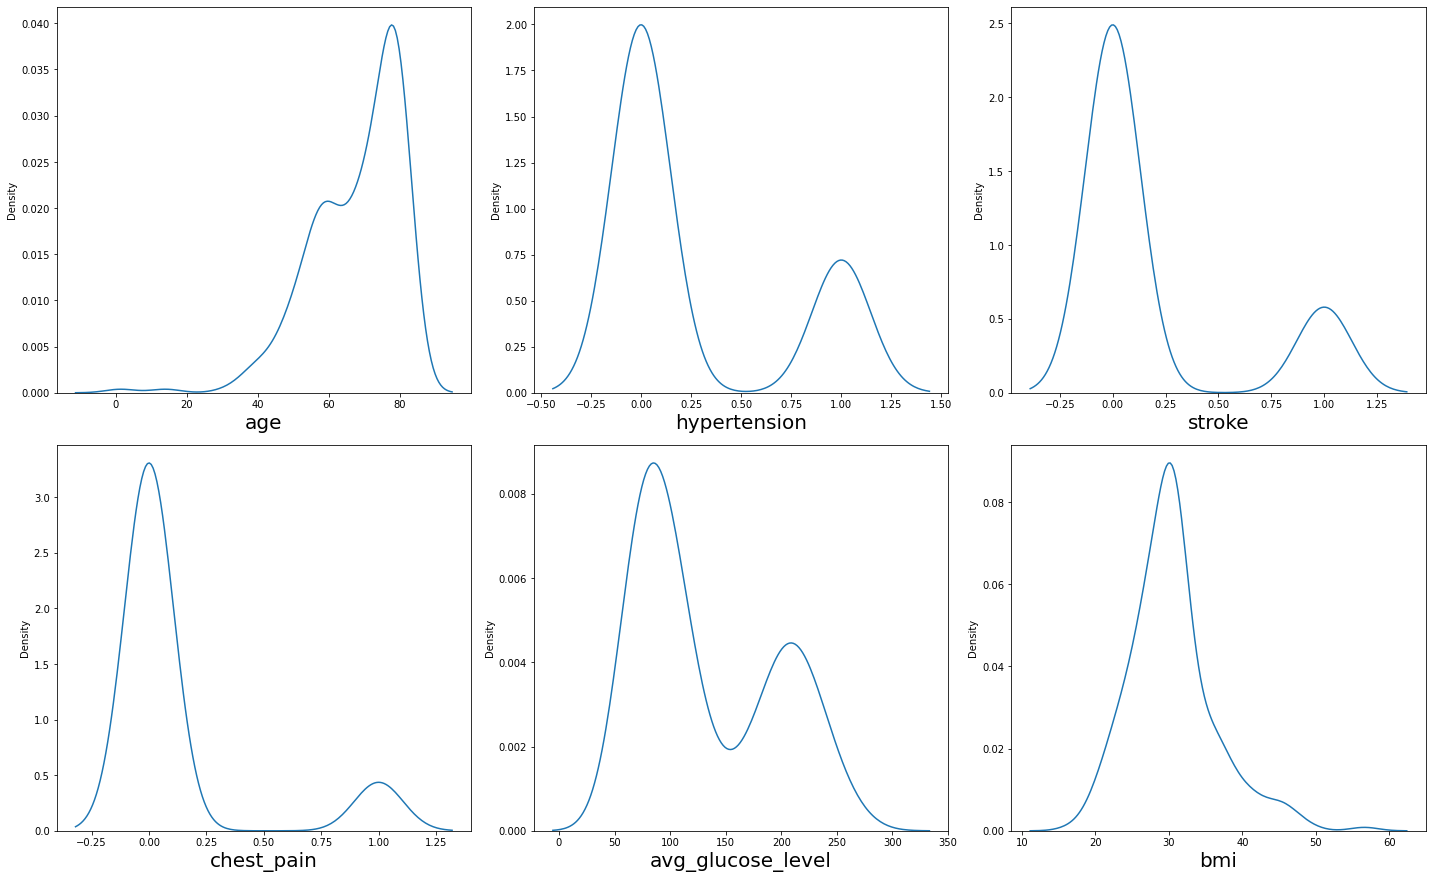

In [17]:
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.kdeplot(cols[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

Categorical Columns

In [18]:
df.gender.value_counts()

Female    141
Male      108
Name: gender, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


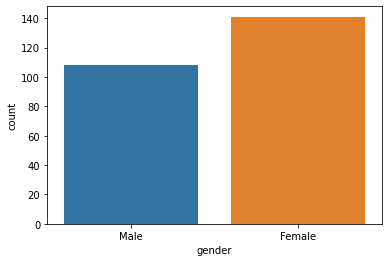

In [19]:
import seaborn as sns
sns.countplot(df['gender'])

In [20]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'stroke', 'chest_pain',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'heart_disease'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


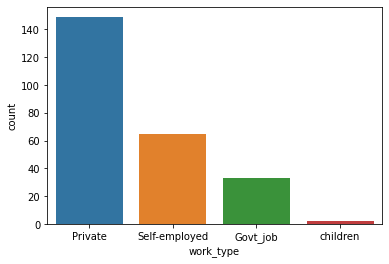

In [21]:
sns.countplot(df['work_type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


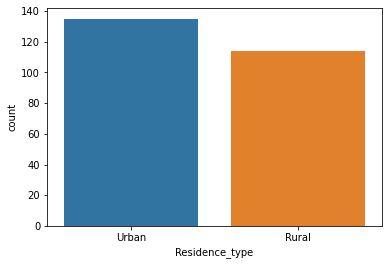

In [22]:
sns.countplot(df['Residence_type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


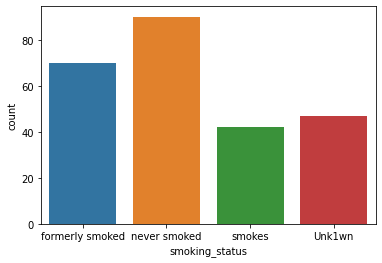

In [23]:
sns.countplot(df['smoking_status'])

In [24]:
# relation between categorical column and target columns

In [25]:
categorical_features = ['gender', 'work_type', 'Residence_type','smoking_status']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

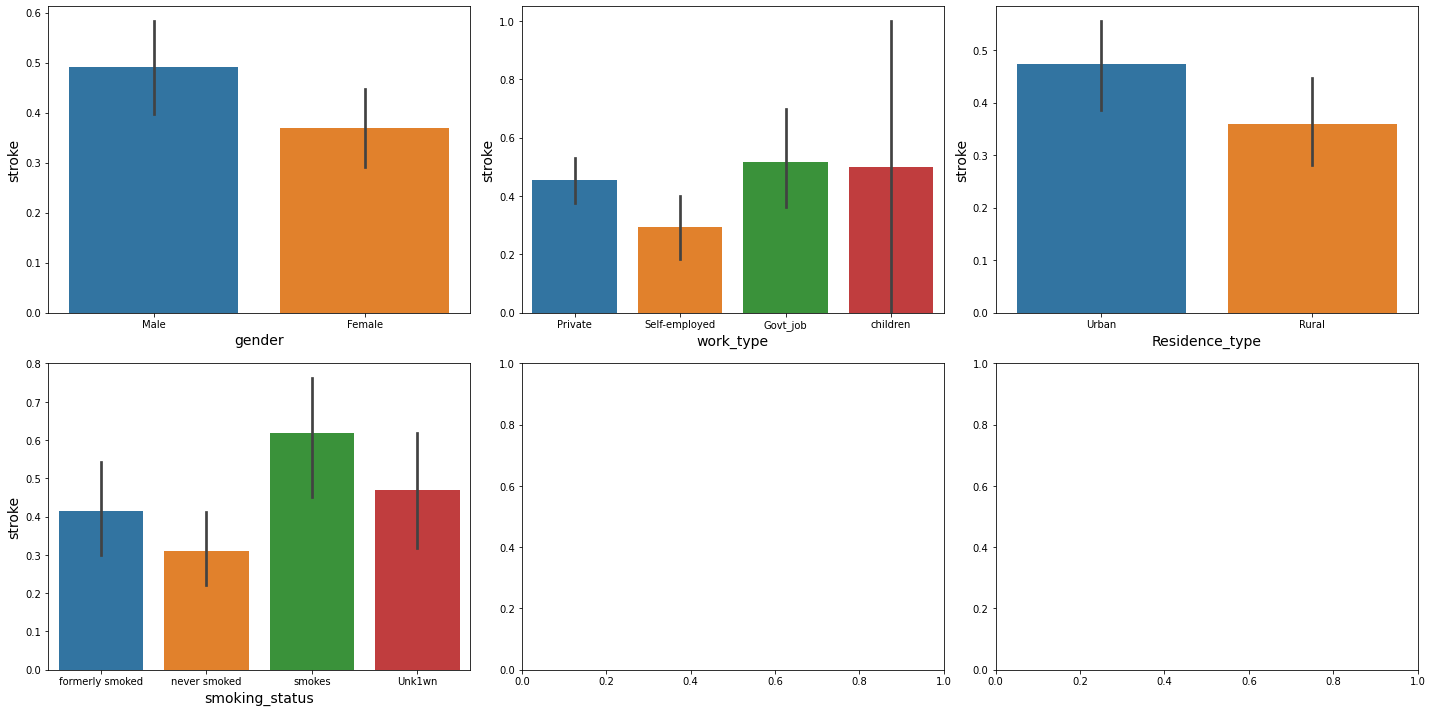

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'heart_disease'

for i, c in enumerate(categorical_features):
    sns.barplot(df[c], df[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()

In [27]:
# pandas profiling
from pandas_profiling import ProfileReport

In [28]:
df.head()

,id,gender,age,hypertension,stroke,chest_pain,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,30.471292,never smoked,0
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.400000,smokes,0
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.000000,never smoked,0


**Handle Categorical Columns**

In [29]:
df.head()

,id,gender,age,hypertension,stroke,chest_pain,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,30.471292,never smoked,0
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.400000,smokes,0
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.000000,never smoked,0


In [30]:
df['smoking_status'].value_counts()

never smoked       90
formerly smoked    70
Unk1wn             47
smokes             42
Name: smoking_status, dtype: int64

In [31]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unk1wn'],
      dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 249 non-null    int64  
 1   gender             249 non-null    object 
 2   age                249 non-null    float64
 3   hypertension       249 non-null    int64  
 4   stroke             249 non-null    int64  
 5   chest_pain         249 non-null    int64  
 6   work_type          249 non-null    object 
 7   Residence_type     249 non-null    object 
 8   avg_glucose_level  249 non-null    float64
 9   bmi                249 non-null    float64
 10  smoking_status     249 non-null    object 
 11  heart_disease      249 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 23.5+ KB


In [33]:
df.gender.value_counts()

Female    141
Male      108
Name: gender, dtype: int64

In [34]:
gender = pd.get_dummies(df[['gender']], drop_first= True)
gender.head()

,gender_Male
0,1
1,0
2,1
3,0
4,0


In [35]:
df.work_type.value_counts()

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64

In [36]:
work = pd.get_dummies(df[['work_type']], drop_first= True)
work.head()

,work_type_Private,work_type_Self-employed,work_type_children
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [37]:
residence = pd.get_dummies(df[['Residence_type']], drop_first= True)
residence.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [38]:
smoking = pd.get_dummies(df[['smoking_status']], drop_first= True)
smoking.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [39]:
data = pd.concat([df, gender, work, residence, smoking], axis = 1)
data.head()

,id,gender,age,hypertension,stroke,chest_pain,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_disease,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,0,Private,Urban,228.69,36.600000,formerly smoked,1,1,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,0,Self-employed,Rural,202.21,30.471292,never smoked,0,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,0,Private,Rural,105.92,32.500000,never smoked,1,1,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,0,Private,Urban,171.23,34.400000,smokes,0,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,0,Self-employed,Rural,174.12,24.000000,never smoked,0,0,0,1,0,0,0,1,0


In [40]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

,id,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,0,228.69,36.600000,1,1,1,0,0,1,1,0,0
1,51676,61.0,0,0,0,202.21,30.471292,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,0,105.92,32.500000,1,1,1,0,0,0,0,1,0
3,60182,49.0,0,0,0,171.23,34.400000,0,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,0,174.12,24.000000,0,0,0,1,0,0,0,1,0


In [41]:
data = data.drop(columns="id" , axis=1)
data.head()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,228.69,36.600000,1,1,1,0,0,1,1,0,0
1,61.0,0,0,0,202.21,30.471292,0,0,0,1,0,0,0,1,0
2,80.0,0,1,0,105.92,32.500000,1,1,1,0,0,0,0,1,0
3,49.0,0,0,0,171.23,34.400000,0,0,1,0,0,1,0,0,1
4,79.0,1,0,0,174.12,24.000000,0,0,0,1,0,0,0,1,0


In [42]:
data.columns

Index(['age', 'hypertension', 'stroke', 'chest_pain', 'avg_glucose_level',
       'bmi', 'heart_disease', 'gender_Male', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [43]:
# Standardize the numerical features
# from sklearn.preprocessing import StandardScaler
# numerical_feature = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
# scaler = StandardScaler()
# scaler.fit(data[numerical_feature])

# data.loc[:, numerical_feature] = scaler.transform(data[numerical_feature])

In [44]:
data.head()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,228.69,36.600000,1,1,1,0,0,1,1,0,0
1,61.0,0,0,0,202.21,30.471292,0,0,0,1,0,0,0,1,0
2,80.0,0,1,0,105.92,32.500000,1,1,1,0,0,0,0,1,0
3,49.0,0,0,0,171.23,34.400000,0,0,1,0,0,1,0,0,1
4,79.0,1,0,0,174.12,24.000000,0,0,0,1,0,0,0,1,0


In [45]:
data.describe()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,67.728193,0.265060,0.188755,0.116466,132.544739,30.471292,0.421687,0.433735,0.598394,0.261044,0.008032,0.542169,0.281124,0.361446,0.168675
std,12.727419,0.442254,0.392102,0.321429,61.921056,5.796581,0.494824,0.496588,0.491210,0.440089,0.089441,0.499222,0.450454,0.481387,0.375219
min,1.320000,0.000000,0.000000,0.000000,56.110000,16.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,0.000000,79.790000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.000000,0.000000,0.000000,0.000000,105.220000,30.471292,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,78.000000,1.000000,0.000000,0.000000,196.710000,32.500000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,271.740000,56.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Correalation between features and target


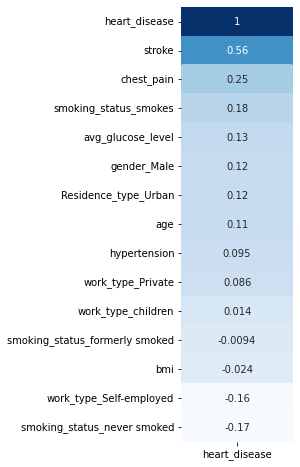

In [47]:
corr = data.corr()['heart_disease'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

# **Split dataset into train and test**

In [48]:
data.head()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,heart_disease,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,228.69,36.600000,1,1,1,0,0,1,1,0,0
1,61.0,0,0,0,202.21,30.471292,0,0,0,1,0,0,0,1,0
2,80.0,0,1,0,105.92,32.500000,1,1,1,0,0,0,0,1,0
3,49.0,0,0,0,171.23,34.400000,0,0,1,0,0,1,0,0,1
4,79.0,1,0,0,174.12,24.000000,0,0,0,1,0,0,0,1,0


In [49]:
x = data.drop("heart_disease", axis=1)
x.head()

,age,hypertension,stroke,chest_pain,avg_glucose_level,bmi,gender_Male,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,228.69,36.600000,1,1,0,0,1,1,0,0
1,61.0,0,0,0,202.21,30.471292,0,0,1,0,0,0,1,0
2,80.0,0,1,0,105.92,32.500000,1,1,0,0,0,0,1,0
3,49.0,0,0,0,171.23,34.400000,0,1,0,0,1,0,0,1
4,79.0,1,0,0,174.12,24.000000,0,0,1,0,0,0,1,0


In [50]:
y = data[['heart_disease']]
y.head()

,heart_disease
0,1
1,0
2,1
3,0
4,0


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [52]:
x

array([[-0.05732972, -0.6005462 ,  2.07313105, ...,  1.59910689,
        -0.75235479, -0.45044262],
       [-0.52970236, -0.6005462 , -0.48236217, ..., -0.62534906,
         1.32916014, -0.45044262],
       [ 0.96614432, -0.6005462 ,  2.07313105, ..., -0.62534906,
         1.32916014, -0.45044262],
       ...,
       [ 0.57250046, -0.6005462 , -0.48236217, ...,  1.59910689,
        -0.75235479, -0.45044262],
       [ 0.25758537,  1.66515083, -0.48236217, ..., -0.62534906,
        -0.75235479, -0.45044262],
       [ 0.80868677, -0.6005462 , -0.48236217, ..., -0.62534906,
        -0.75235479, -0.45044262]])

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [54]:
x_train

array([[ 0.88741554, -0.6005462 , -0.48236217, ..., -0.62534906,
        -0.75235479, -0.45044262],
       [-1.31699008, -0.6005462 , -0.48236217, ...,  1.59910689,
        -0.75235479, -0.45044262],
       [ 0.80868677,  1.66515083, -0.48236217, ..., -0.62534906,
         1.32916014, -0.45044262],
       ...,
       [-0.84461745, -0.6005462 , -0.48236217, ..., -0.62534906,
         1.32916014, -0.45044262],
       [ 1.04487309, -0.6005462 , -0.48236217, ..., -0.62534906,
        -0.75235479, -0.45044262],
       [ 0.49377168, -0.6005462 , -0.48236217, ...,  1.59910689,
        -0.75235479, -0.45044262]])

# **Model** **Training**

In [55]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state=1)
decision.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [56]:
# accuracy
decision.score(x_test, y_test)

0.7831325301204819

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

<ipython-input-57-91513dc11b60>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

In [58]:
# accuracy
rf.score(x_test, y_test)

0.8433734939759037

In [59]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [60]:
model.score(x_test,y_test)

0.7831325301204819

In [61]:
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
kc.score(x_test,y_test)

0.7469879518072289

In [63]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [64]:
lg.score(x_test,y_test)

0.7951807228915663

In [65]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.588 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.588 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.576 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.606 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.758 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.758 total time=   0.0s
[CV 5/5] END ........C=1, ga

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.758 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.765 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.788 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ......C=10, ga

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.647 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.794 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.606 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.697 total time=   0.0s
[CV 4/5] END .....C=100, gam

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.727 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.788 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.765 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.788 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.788 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.788 total time=   0.0s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.545 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.576 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=1000, ga

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.758 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.788 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.765 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.727 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.727 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.788 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [66]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [67]:
from sklearn.svm import SVC
model = SVC(C= 0.1, gamma = 1, kernel = 'rbf')
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, gamma=1)

In [68]:
model.score(x_test,y_test)

0.5542168674698795

In [69]:
prep = model.predict(x_test)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prep))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        46
           1       0.00      0.00      0.00        37

    accuracy                           0.55        83
   macro avg       0.28      0.50      0.36        83
weighted avg       0.31      0.55      0.40        83



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Saving Model**

In [71]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(model,file)